In [20]:
import torch
import pandas as pd
import numpy as np

torch.cuda.is_available()

True

In [21]:
torch.cuda.device_count()

1

In [22]:
torch.cuda.current_device()

0

In [23]:
torch.cuda.device(0)

In [24]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2070'

In [7]:
#train = pd.read_csv('Positive Game Review Data.csv')
#train_tensor = torch.tensor(train.to_numpy())

# read in the data
starting_pos_train_data = np.genfromtxt("Positive_Game_Review_Data.csv", delimiter=",")
# drop the headers
edited_pos_train_data = np.delete(starting_pos_train_data, 0, 0)
# drop the column of names
edited_pos_train_data = np.delete(edited_pos_train_data, 1, 1)
# drop the column of ids
edited_pos_train_data = np.delete(edited_pos_train_data, 0, 1)
# get all the rows where the tag is action (the last column == 1)
clipped_pos_1_train_data = edited_pos_train_data[np.where(edited_pos_train_data[:,4] == 1)]
# drop that tag row and the player count and hours played rows
cleaned_pos_1_train_data = clipped_pos_1_train_data[:, [1,2,3]]

starting_neg_train_data = np.genfromtxt("Negative_Game_Review_Data.csv", delimiter=",")
edited_neg_train_data = np.delete(starting_neg_train_data, 0, 0)
edited_neg_train_data = np.delete(edited_neg_train_data, 1, 1)
edited_neg_train_data = np.delete(edited_neg_train_data, 0, 1)
clipped_neg_1_train_data = edited_neg_train_data[np.where(edited_neg_train_data[:,4] == 1)]
cleaned_neg_1_train_data = clipped_neg_1_train_data[:, [1,2,3]]

cleaned_train_1_data = np.concatenate((cleaned_pos_1_train_data, cleaned_neg_1_train_data), axis=0)

# to tensor
train_tensor_1 = torch.from_numpy(cleaned_train_1_data)
train_tensor_1

tensor([[2.2795e+05, 8.0000e+00, 2.6166e+04],
        [1.4399e+05, 5.0000e+00, 2.0778e+04],
        [1.9160e+05, 5.0000e+00, 2.8813e+05],
        ...,
        [7.8490e+03, 3.0000e+00, 4.3020e+03],
        [1.2140e+03, 2.0000e+00, 8.3240e+03],
        [3.6300e+03, 1.0000e+00, 7.5760e+03]], dtype=torch.float64)

In [8]:
torch.count_nonzero(train_tensor_1, dim=0)

tensor([374, 374, 374])

In [9]:
from kmeans_pytorch import kmeans

num_clusters = 9

# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=train_tensor_1, num_clusters=num_clusters, distance='euclidean', device=torch.device('cuda:0')
)

running k-means on cuda:0..


[running kmeans]: 20it [00:00, 138.89it/s, center_shift=0.000000, iteration=20, tol=0.000100]         


In [10]:
cluster_ids_x

tensor([2, 6, 3, 7, 4, 6, 2, 2, 1, 0, 0, 3, 6, 3, 2, 3, 1, 4, 3, 5, 3, 4, 5, 4,
        7, 7, 1, 3, 3, 7, 6, 7, 6, 2, 2, 4, 3, 0, 0, 0, 4, 4, 7, 0, 1, 6, 4, 2,
        2, 6, 0, 3, 4, 4, 5, 5, 0, 1, 2, 4, 0, 1, 5, 6, 5, 2, 3, 1, 5, 1, 6, 4,
        1, 7, 4, 0, 0, 8, 7, 7, 3, 7, 1, 7, 4, 1, 0, 6, 0, 4, 1, 6, 3, 4, 5, 0,
        5, 0, 2, 7, 4, 2, 7, 6, 7, 4, 0, 3, 1, 0, 4, 3, 3, 2, 3, 0, 4, 3, 5, 7,
        3, 5, 5, 4, 4, 5, 7, 2, 6, 2, 4, 2, 0, 5, 4, 7, 7, 3, 3, 7, 0, 7, 4, 1,
        0, 3, 5, 0, 6, 5, 0, 4, 7, 3, 4, 6, 4, 2, 3, 8, 7, 5, 5, 3, 6, 2, 7, 7,
        3, 4, 5, 3, 1, 4, 5, 5, 7, 7, 0, 8, 3, 5, 3, 4, 2, 7, 3, 5, 2, 0, 6, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [11]:
cluster_centers

tensor([[5.3450e+04, 6.8400e+00, 7.0038e+04],
        [2.5712e+05, 7.7333e+00, 2.3589e+05],
        [2.4732e+05, 7.1500e+00, 4.7471e+04],
        [1.5141e+05, 6.8333e+00, 2.4565e+05],
        [4.5670e+04, 6.9032e+00, 2.3722e+05],
        [2.1331e+05, 6.9130e+00, 1.4779e+05],
        [1.4252e+05, 6.5294e+00, 5.3211e+04],
        [1.0596e+05, 6.5926e+00, 1.5618e+05],
        [5.3565e+03, 2.5699e+00, 5.1590e+03]])

In [16]:
centers = cluster_centers.numpy()
centers

array([[5.34500000e+04, 6.83999968e+00, 7.00379609e+04],
       [2.57116281e+05, 7.73333359e+00, 2.35890016e+05],
       [2.47324609e+05, 7.15000010e+00, 4.74709492e+04],
       [1.51409344e+05, 6.83333349e+00, 2.45652141e+05],
       [4.56700312e+04, 6.90322542e+00, 2.37215125e+05],
       [2.13310562e+05, 6.91304350e+00, 1.47788703e+05],
       [1.42515234e+05, 6.52941179e+00, 5.32110000e+04],
       [1.05960516e+05, 6.59259272e+00, 1.56184078e+05],
       [5.35650537e+03, 2.56989241e+00, 5.15902148e+03]], dtype=float32)

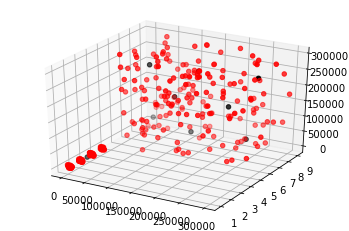

In [18]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cleaned_train_1_data[:, [0]], cleaned_train_1_data[:, [1]], cleaned_train_1_data[:, [2]], color='red')
ax.scatter(cluster_centers[:, [0]], cluster_centers[:, [1]], cluster_centers[:, [2]], color="black")
plt.show()

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(train_tensor_1[:,0], train_tensor_1[:,1], c=cluster_ids_x)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c="red", s=50, alpha=0.8)
plt.axis([0, 10, 0, 350000])
plt.tight_layout()
plt.show()

In [19]:
# Save centers in a csv
cluster_centers_1_np = cluster_centers.numpy()
cluster_centers_1_df = pd.DataFrame(cluster_centers_1_np)
cluster_centers_1_df.to_csv('cluster_centers_2.csv')

In [26]:
base_data_train = np.genfromtxt("base_data.csv", delimiter=",")
# drop the headers
edited_base_data_train = np.delete(base_data_train, 0, 0)
# drop the column of names
base_data_clean = np.delete(edited_base_data_train, 0, 1)
base_data_clean

array([[6.60000e+00, 1.14500e+03, 6.84900e+03],
       [5.00000e+00, 5.16000e+02, 1.81828e+05],
       [8.50000e+00, 3.57900e+03, 1.11200e+03],
       [2.10000e+00, 4.74900e+03, 9.67200e+03],
       [4.30000e+00, 1.67900e+03, 8.60700e+04],
       [8.20000e+00, 3.06000e+02, 2.24310e+04],
       [7.00000e+00, 1.81400e+03, 5.36470e+04],
       [6.10000e+00, 1.65500e+03, 3.04241e+05],
       [8.60000e+00, 1.40000e+01, 6.99100e+03],
       [3.90000e+00, 3.92500e+03, 4.46120e+04]])

In [27]:
train_tensor_2 = torch.from_numpy(base_data_clean)
train_tensor_2

tensor([[6.6000e+00, 1.1450e+03, 6.8490e+03],
        [5.0000e+00, 5.1600e+02, 1.8183e+05],
        [8.5000e+00, 3.5790e+03, 1.1120e+03],
        [2.1000e+00, 4.7490e+03, 9.6720e+03],
        [4.3000e+00, 1.6790e+03, 8.6070e+04],
        [8.2000e+00, 3.0600e+02, 2.2431e+04],
        [7.0000e+00, 1.8140e+03, 5.3647e+04],
        [6.1000e+00, 1.6550e+03, 3.0424e+05],
        [8.6000e+00, 1.4000e+01, 6.9910e+03],
        [3.9000e+00, 3.9250e+03, 4.4612e+04]], dtype=torch.float64)

In [28]:
from kmeans_pytorch import kmeans

num_clusters = 10

# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=train_tensor_2, num_clusters=num_clusters, distance='euclidean', device=torch.device('cuda:0')
)

running k-means on cuda:0..


[running kmeans]: 1it [00:00,  2.23it/s, center_shift=0.000000, iteration=1, tol=0.000100]


In [29]:
cluster_ids_x

tensor([8, 3, 4, 2, 1, 5, 9, 7, 0, 6])

In [30]:
cluster_centers

tensor([[8.6000e+00, 1.4000e+01, 6.9910e+03],
        [4.3000e+00, 1.6790e+03, 8.6070e+04],
        [2.1000e+00, 4.7490e+03, 9.6720e+03],
        [5.0000e+00, 5.1600e+02, 1.8183e+05],
        [8.5000e+00, 3.5790e+03, 1.1120e+03],
        [8.2000e+00, 3.0600e+02, 2.2431e+04],
        [3.9000e+00, 3.9250e+03, 4.4612e+04],
        [6.1000e+00, 1.6550e+03, 3.0424e+05],
        [6.6000e+00, 1.1450e+03, 6.8490e+03],
        [7.0000e+00, 1.8140e+03, 5.3647e+04]])

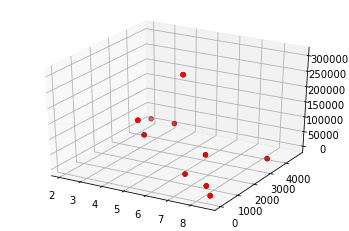

In [33]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(base_data_clean[:, [0]], base_data_clean[:, [1]], base_data_clean[:, [2]], color='red')
ax.scatter(cluster_centers[:, [0]], cluster_centers[:, [1]], cluster_centers[:, [2]], color="black")
plt.show()

In [32]:
cluster_centers_2_np = cluster_centers.numpy()
cluster_centers_2_df = pd.DataFrame(cluster_centers_2_np)
cluster_centers_2_df.to_csv('cluster_centers_2.csv')